# Using OpenCV for Shadow Detection

Step 1: Loading & Preprocessing the Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
img = cv2.imread('background.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Resize for easier processing
gray = cv2.resize(gray, (800, 600))

Step 2: Enhancing the Contrast to Make Shadows More Visible

In [4]:
# Apply histogram equalization
gray_eq = cv2.equalizeHist(gray)

Step 3: Threshold to Isolate Darker Regions (Possible Shadows)

In [61]:
# Simple threshold: anything below a certain intensity = shadow
_, shadow_mask = cv2.threshold(gray_eq, 180, 255, cv2.THRESH_BINARY_INV)

Step 4: Clean up the Mask

In [62]:
# Remove noise
kernel = np.ones((5,5), np.uint8)
shadow_mask_clean = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
shadow_mask_clean = cv2.morphologyEx(shadow_mask_clean, cv2.MORPH_CLOSE, kernel)

Step 5: Edge Detection for Shadow Hardness

In [69]:
edges = cv2.Canny(shadow_mask_clean, 50, 150)

Step 5: Find Large Shadow Contours

In [70]:
contours, _ = cv2.findContours(shadow_mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # tune threshold

In [71]:
# --- Draw ellipses and light/shadow directions ---
output = img.copy()

In [72]:
for cnt in large_contours:
    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)
        (x, y), (MA, ma), angle = ellipse

        # Draw ellipse around shadow region
        cv2.ellipse(output, ellipse, (0,255,0), 2)

        # Compute direction vector (shadow direction = major axis of ellipse)
        theta = np.deg2rad(angle)
        length = 100
        dx = int(length * np.cos(theta))
        dy = int(length * np.sin(theta))

        # Draw shadow direction (blue arrow)
        cv2.arrowedLine(output, (int(x), int(y)), (int(x+dx), int(y+dy)), (255,0,0), 3, tipLength=0.2)

        # Draw light source direction (opposite arrow, red)
        cv2.arrowedLine(output, (int(x), int(y)), (int(x-dx), int(y-dy)), (0,0,255), 3, tipLength=0.2)

Step 6: Visualing the Results

In [92]:
plt.figure(figsize=(24, 10))

<Figure size 2400x1000 with 0 Axes>

<Figure size 2400x1000 with 0 Axes>

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

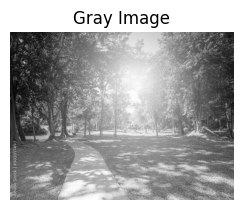

In [98]:
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

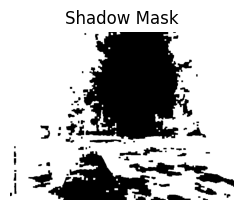

In [99]:
plt.subplot(2, 2, 2)
plt.imshow(shadow_mask_clean, cmap='gray')
plt.title('Shadow Mask')
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

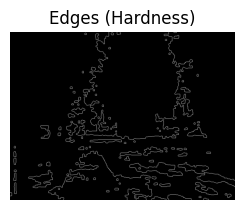

In [100]:
plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Hardness)')
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(666.5), np.float64(-0.5))

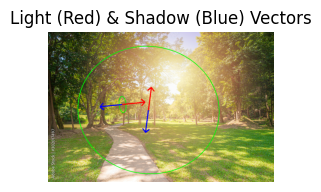

In [101]:
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Light (Red) & Shadow (Blue) Vectors')
plt.axis('off')

In [78]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>